<a href="https://colab.research.google.com/github/PatrykCiwinski/Topic_modeling-LDA/blob/main/Topic_modeling(LDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LDA

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import textwrap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!gdown 1iboAP6jwWe0FnhYlz97Q_62Udc2aTNp4

Downloading...
From: https://drive.google.com/uc?id=1iboAP6jwWe0FnhYlz97Q_62Udc2aTNp4
To: /content/bbc_text_cls.csv
100% 5.09M/5.09M [00:00<00:00, 24.5MB/s]


In [4]:
df=pd.read_csv('bbc_text_cls.csv')

In [5]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
#stop-words
stop_words=set(stopwords.words('english'))
stop_words = stop_words.union({'said','would','could','told','also','new','year'})

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [34]:
def clean_text(headline):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(headline)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text

In [35]:
df['cleaned_text']=df['text'].apply(clean_text)

In [36]:
vectorizer = CountVectorizer(max_features=1000)

In [37]:
X=vectorizer.fit_transform(df['cleaned_text'])

In [38]:
no_topics=df['labels'].nunique()

In [39]:
lda=LatentDirichletAllocation(n_components=no_topics)

In [40]:
Z = lda.fit_transform(X)

In [41]:
topics = lda.components_

In [42]:
# Print the topics with their terms
terms = vectorizer.get_feature_names_out()

for index, component in enumerate(topics):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:7]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index+1)+": ",top_terms_list)

Topic 1:  ['film', 'company', 'market', 'firm', 'sale', 'best', 'last']
Topic 2:  ['mobile', 'people', 'game', 'phone', 'technology', 'service', 'digital']
Topic 3:  ['government', 'labour', 'party', 'election', 'people', 'minister', 'blair']
Topic 4:  ['music', 'people', 'show', 'software', 'computer', 'make', 'system']
Topic 5:  ['game', 'first', 'time', 'year', 'england', 'player', 'last']


# We can forecast topics as follows:

Topic 1:business,
Topic 2:tech,
Topic 3:politics,
Topic 4:entertainment,
Topic 5:sports

In [43]:
def wrap(x):
  return textwrap.fill(x, replace_whitespace=False, fix_sentence_endings=True)

In [44]:
i = np.random.choice(len(df))
z=Z[i]
topics=np.arange(5)+1

In [45]:
z_df = pd.DataFrame(z)
max_value = z_df.idxmax()

In [46]:
max_idx = max_value.tolist()

In [47]:
print(wrap(df.iloc[i]['cleaned_text']))

Wolves appoint Hoddle manager Glenn Hoddle unveiled Wolves manager
Tuesday club confirmed former England coach unveiled successor Dave
Jones news conference Molineux 1100 Hoddle linked return former club
Southampton Wolves race service game since sacked Spurs September 2003
worked alongside Wolves caretaker bos Stuart Gray Southampton Hoddle
began managerial career player-boss Swindon moving Chelsea taking
England spell charge national side came 1998 World made controversial
remark disabled newspaper interview 47-year-old later returned
management Southampton succeeded Jones done Wolves engineered upturn
Saints fortune lured White Hart Lane Tottenham club made name player
That relationship turned sour start last campaign left London club
early last season Since applied unsuccessfully post France manager
linked return Southampton Wolves currently 17th Championship home game
Millwall Tuesday


In [48]:
pred_topics = {'Topic 1':'business',
'Topic 2':'tech',
'Topic 3':'politics',
'Topic 4':'entertainment',
'Topic 5':'sports'}

In [49]:
values = list(pred_topics.values())


Text(0.5, 1.0, 'True label: sport, pred_label: sports')

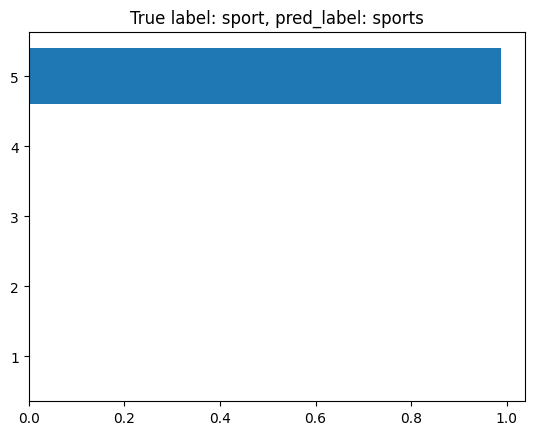

In [51]:
fig,ax= plt.subplots()
ax.barh(topics,z)
ax.set_title(f'True label: {df.iloc[i]["labels"]}, pred_label: {values[max_value[0]]}')